# Cover Types

In [1]:
import numpy as np
import pandas as pd
import minisom
import sklearn.model_selection
import sklearn.metrics
import sklearn.preprocessing
import sklearn.decomposition
import imblearn.over_sampling
import matplotlib.pyplot as plt
import matplotlib.gridspec as gds
import seaborn as sns

In [2]:
def classify(som, data, class_assignments):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = class_assignments
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result


In [3]:
som_size = 20

## 1. Loading dataset and analyzing data distribuition

In [4]:
# load dataset, separate into data and target
dataset_raw = pd.read_csv('covtype.csv', dtype=np.double)
X = dataset_raw.iloc[:, :-1]
y = dataset_raw.iloc[:, -1]


In [5]:
dataset_raw


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


### Description by Pandas

In [6]:
pd.set_option('display.max_columns', None)
dataset_raw.describe()

# No missing atributes
# Needs rescaling and normalization / standardization


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

### Dataset shape

In [7]:
dataset_raw.shape


(581012, 55)

### Skewness

In [8]:
dataset_raw.skew()

# Close to 0 -> less skewness


Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                              9.240061
Soil_Type7          

### Class distribuition

In [9]:
dataset_raw.groupby('Cover_Type').size()

# Large disparity between the classes
# May need rebalancing


Cover_Type
1.0    211840
2.0    283301
3.0     35754
4.0      2747
5.0      9493
6.0     17367
7.0     20510
dtype: int64

### Correlation

In [10]:
# ignoring binary columns for correlation matrix
size = 10
corr = dataset_raw.iloc[:, :size].corr()


In [11]:
# search for high-correlated features
threshold = 0.5
corr_list = []

for i in range(0, size):
    for j in range(i+1, size):
        if(corr.iloc[i, j] >= threshold or corr.iloc[i, j] <= -threshold):
            corr_list.append([corr.iloc[i, j], i, j])

corr_list = sorted(corr_list, key=lambda x: -abs(x[0]))

print("Most correlated features:")
for v, i, j in corr_list:
    print('%s x %s: %.2f' % (dataset_raw.columns[i], dataset_raw.columns[j], v))


Most correlated features:
Hillshade_9am x Hillshade_3pm: -0.78
Aspect x Hillshade_3pm: 0.65
Horizontal_Distance_To_Hydrology x Vertical_Distance_To_Hydrology: 0.61
Hillshade_Noon x Hillshade_3pm: 0.59
Aspect x Hillshade_9am: -0.58
Slope x Hillshade_Noon: -0.53


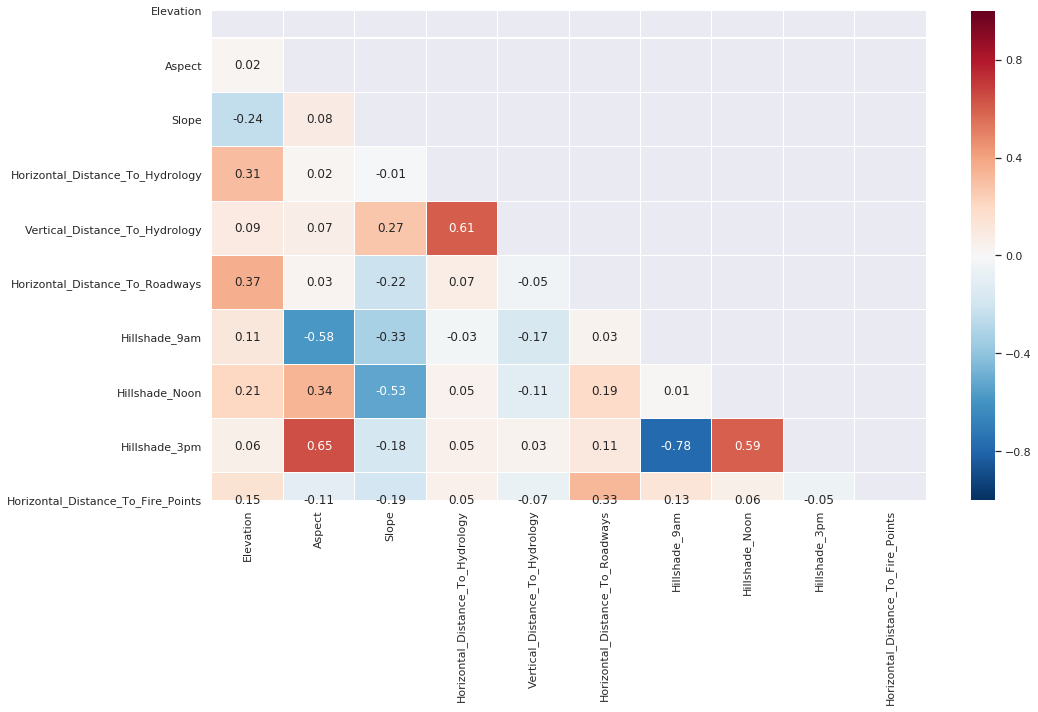

In [12]:
# corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16, 9))
sns.set()
sns.heatmap(corr, vmin=-1.0, vmax=1.0, cmap="RdBu_r", center=0.0, linewidths=0.05, annot=True, fmt='.2f', xticklabels='auto', yticklabels='auto', mask=mask)
plt.show()


### Plotting data interaction of most related features

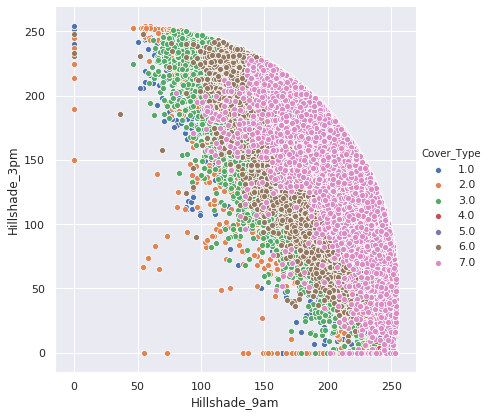

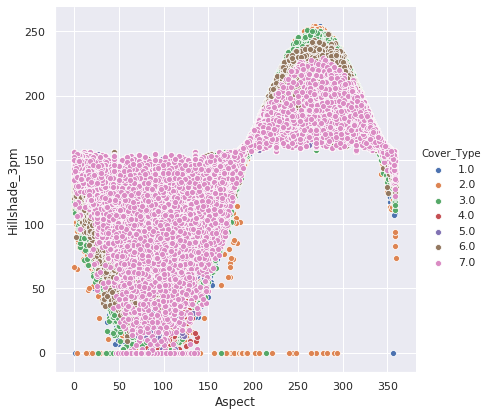

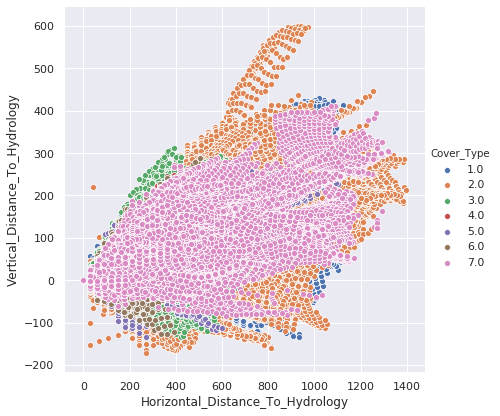

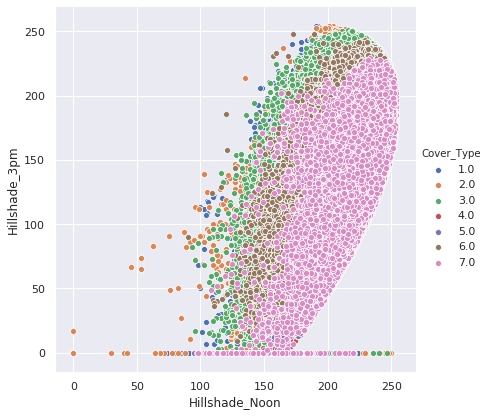

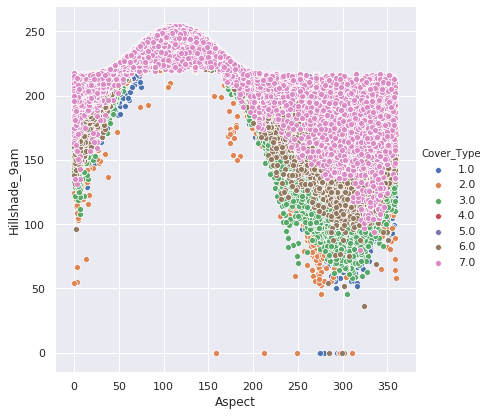

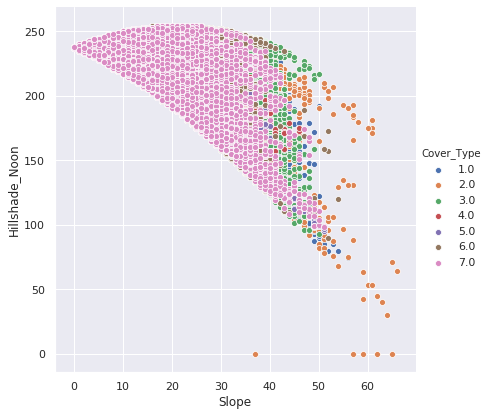

In [13]:
for v,i,j in corr_list:
    sns.set()
    sns.pairplot(dataset_raw, hue="Cover_Type", height=6, x_vars=dataset_raw.columns[i],y_vars=dataset_raw.columns[j])
    plt.show()


## 2. SOM Initialization and training (without preprocessing)

### Separating dataset into training and testing datasets

In [14]:
# separate into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train.groupby(y_train).size())
print(y_test.groupby(y_test).size())


(464809, 54) (464809,)
(116203, 54) (116203,)
Cover_Type
1.0    169422
2.0    226661
3.0     28618
4.0      2162
5.0      7628
6.0     13950
7.0     16368
Name: Cover_Type, dtype: int64
Cover_Type
1.0    42418
2.0    56640
3.0     7136
4.0      585
5.0     1865
6.0     3417
7.0     4142
Name: Cover_Type, dtype: int64


### Initializing and training the SOM

In [15]:
# initialize som
som_x, som_y = som_size, som_size
num_iteration = som_x * som_y * 100
som = minisom.MiniSom(som_x, som_y, X_train.shape[1])


In [16]:
# Training the SOM
som.pca_weights_init(np.array(X_train))
# som.train_random(np.array(X_train), num_iteration, verbose=True)
som.train_batch(np.array(X_train), num_iteration, verbose=True)


 [ 40000 / 40000 ] 100% - 0:00:00 left 
 quantization error: 279.21857668456204
 topographic error: 0.8624919052772214


In [17]:
# Trying to classify the test dataset
class_assignments = som.labels_map(np.array(X_train), np.array(y_train))
print(sklearn.metrics.classification_report(
    np.array(y_test), classify(som, np.array(X_test), class_assignments)))


/home/andre/anaconda3/envs/som/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         1.0       0.62      0.63      0.62     42418
         2.0       0.66      0.74      0.70     56640
         3.0       0.54      0.59      0.56      7136
         4.0       0.00      0.00      0.00       585
         5.0       0.00      0.00      0.00      1865
         6.0       0.42      0.16      0.23      3417
         7.0       0.57      0.05      0.10      4142

    accuracy                           0.63    116203
   macro avg       0.40      0.31      0.32    116203
weighted avg       0.61      0.63      0.61    116203



### Visualizing training results

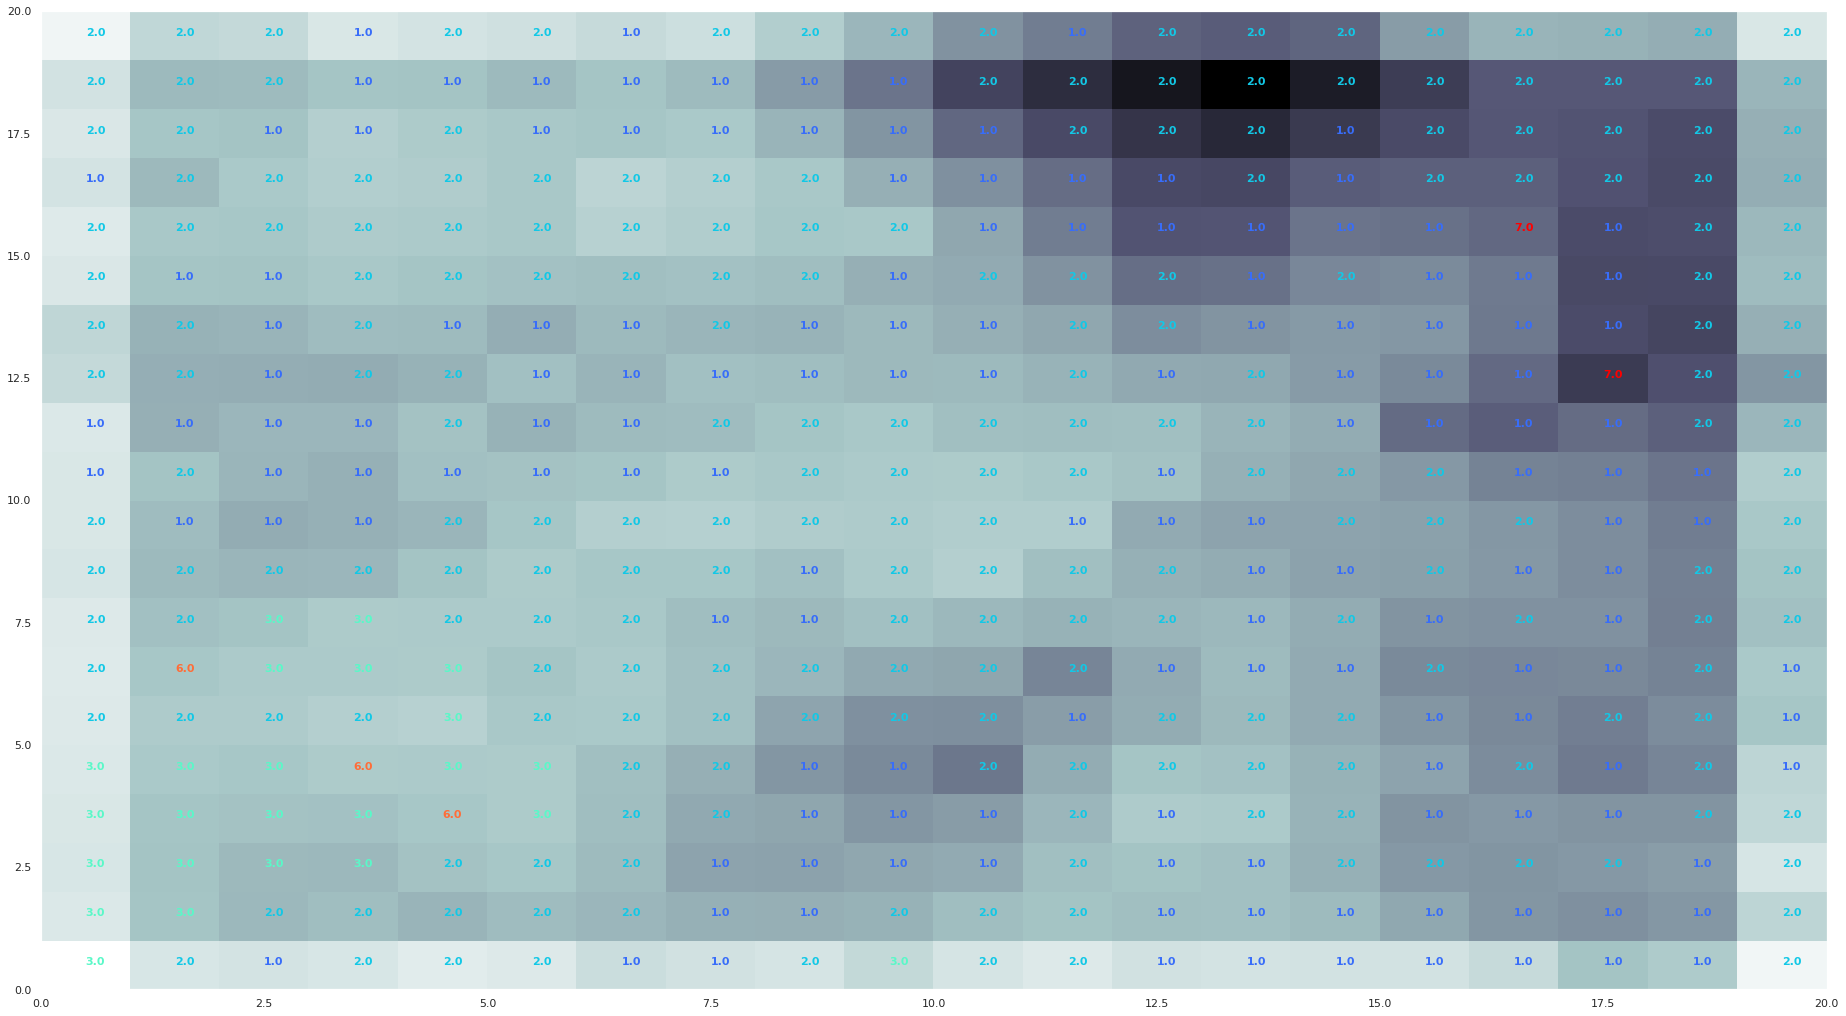

In [18]:
plt.figure(figsize=(32, 18))
plt.pcolor(som.distance_map().T, cmap='bone_r')

for i, j in sorted(class_assignments.keys()):
    t = class_assignments[(i, j)].most_common()[0][0]
    plt.text(i+.5, j+.5, str(t), color=plt.cm.rainbow(t / 7.), fontdict={'weight': 'bold',  'size': 11})
plt.show()


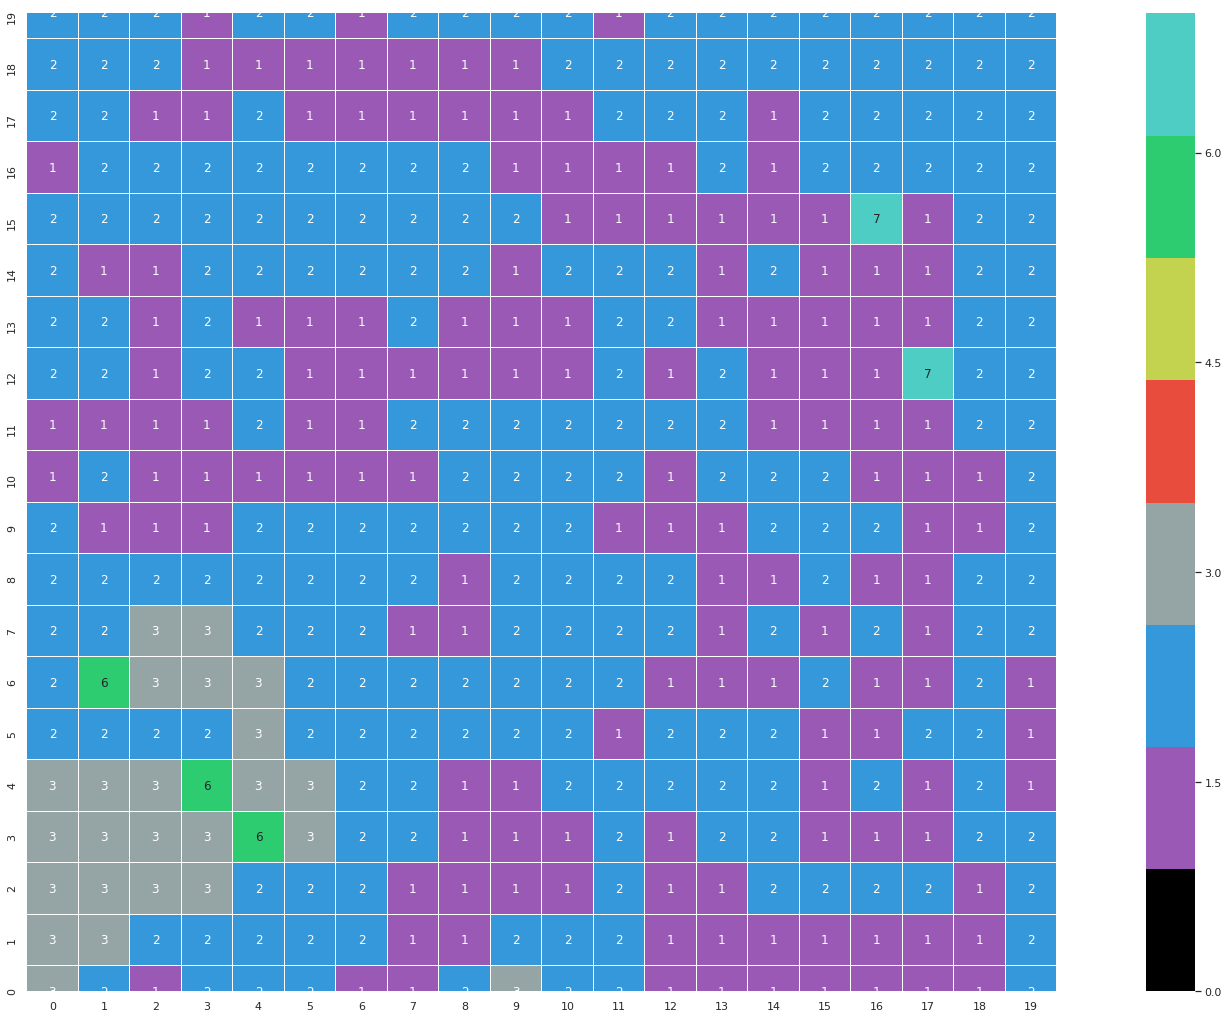

In [19]:
hmap = np.zeros((som_x, som_y))
for i, j in sorted(class_assignments.keys()):
    hmap[i][j] = class_assignments[(i, j)].most_common()[0][0]
hmap = hmap.T
plt.figure(figsize=(32, 18))
ax = sns.heatmap(hmap, vmin=0, vmax=7, annot=True, robust=True, square=True, linewidth=0.1, cmap=sns.color_palette(palette=["#000000", "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#c3d350", "#2ecc71", "#4ecdc4"], n_colors=8))
ax.invert_yaxis()
plt.show()

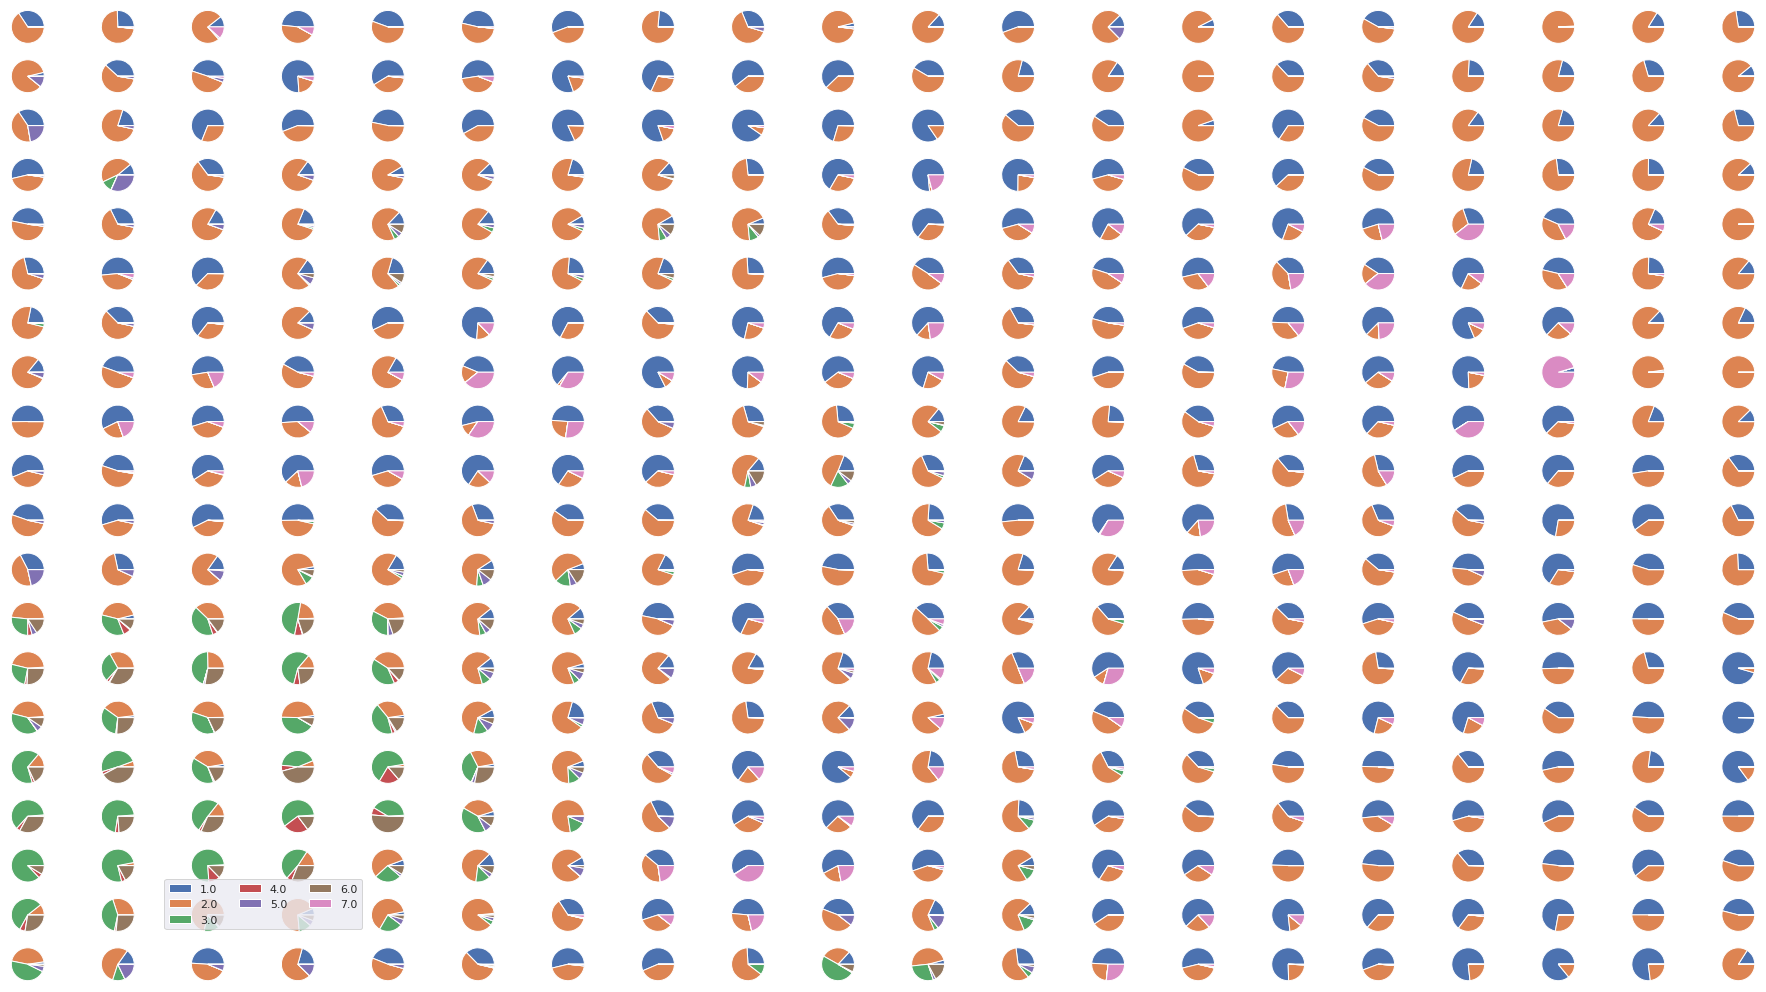

In [20]:
plt.figure(figsize=(32, 18))


labels_map = som.labels_map(np.array(X_train), np.array(y_train))
label_names = np.unique(np.array(y_train))


the_grid = gds.GridSpec(som_x, som_y)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[som_x-1-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)
plt.show()


## 3. SOM Initialization and training (with standardization)

### Separating into training and testing datasets

In [21]:
# separate into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train.groupby(y_train).size())
print(y_test.groupby(y_test).size())

(464809, 54) (464809,)
(116203, 54) (116203,)
Cover_Type
1.0    169634
2.0    226489
3.0     28608
4.0      2175
5.0      7576
6.0     13871
7.0     16456
Name: Cover_Type, dtype: int64
Cover_Type
1.0    42206
2.0    56812
3.0     7146
4.0      572
5.0     1917
6.0     3496
7.0     4054
Name: Cover_Type, dtype: int64


### Data standardization

In [22]:
# using sklearn's StandardScaler
std = sklearn.preprocessing.StandardScaler()

X_train = X_train.copy()
X_test = X_test.copy()
X_train.iloc[:, :10] = std.fit_transform(X_train.iloc[:, :10])
X_test.iloc[:, :10] = std.transform(X_test.iloc[:, :10])


### PCA

In [23]:
pca = sklearn.decomposition.PCA(n_components=2)
principal_components = pca.fit_transform(X_train)
principal_components = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2'])

In [24]:
som_ratio = pca.explained_variance_[0] / pca.explained_variance_[1]
print('Ratio: ', som_ratio)

Ratio:  1.150776300969547


### Initializing and training the SOM

In [25]:
# initialize som
som_x, som_y = int(round(som_ratio * som_size)), int(round(som_size))
num_iteration = som_x * som_y * 100
som = minisom.MiniSom(som_x, som_y, X_train.shape[1])


In [26]:
# Training the SOM
som.pca_weights_init(np.array(X_train))
# som.train_random(np.array(X_train), num_iteration, verbose=True)
som.train_batch(np.array(X_train), num_iteration, verbose=True)


 [ 46000 / 46000 ] 100% - 0:00:00 left 
 quantization error: 1.4965590970035665
 topographic error: 0.9143626737003802


In [27]:
# Trying to classify the test dataset
class_assignments = som.labels_map(np.array(X_train), np.array(y_train))
print(sklearn.metrics.classification_report(
    np.array(y_test), classify(som, np.array(X_test), class_assignments)))


              precision    recall  f1-score   support

         1.0       0.65      0.66      0.66     42206
         2.0       0.70      0.77      0.73     56812
         3.0       0.58      0.78      0.66      7146
         4.0       0.32      0.10      0.16       572
         5.0       0.47      0.03      0.06      1917
         6.0       0.42      0.09      0.15      3496
         7.0       0.45      0.10      0.16      4054

    accuracy                           0.67    116203
   macro avg       0.51      0.36      0.37    116203
weighted avg       0.65      0.67      0.65    116203



### Visualizing training results

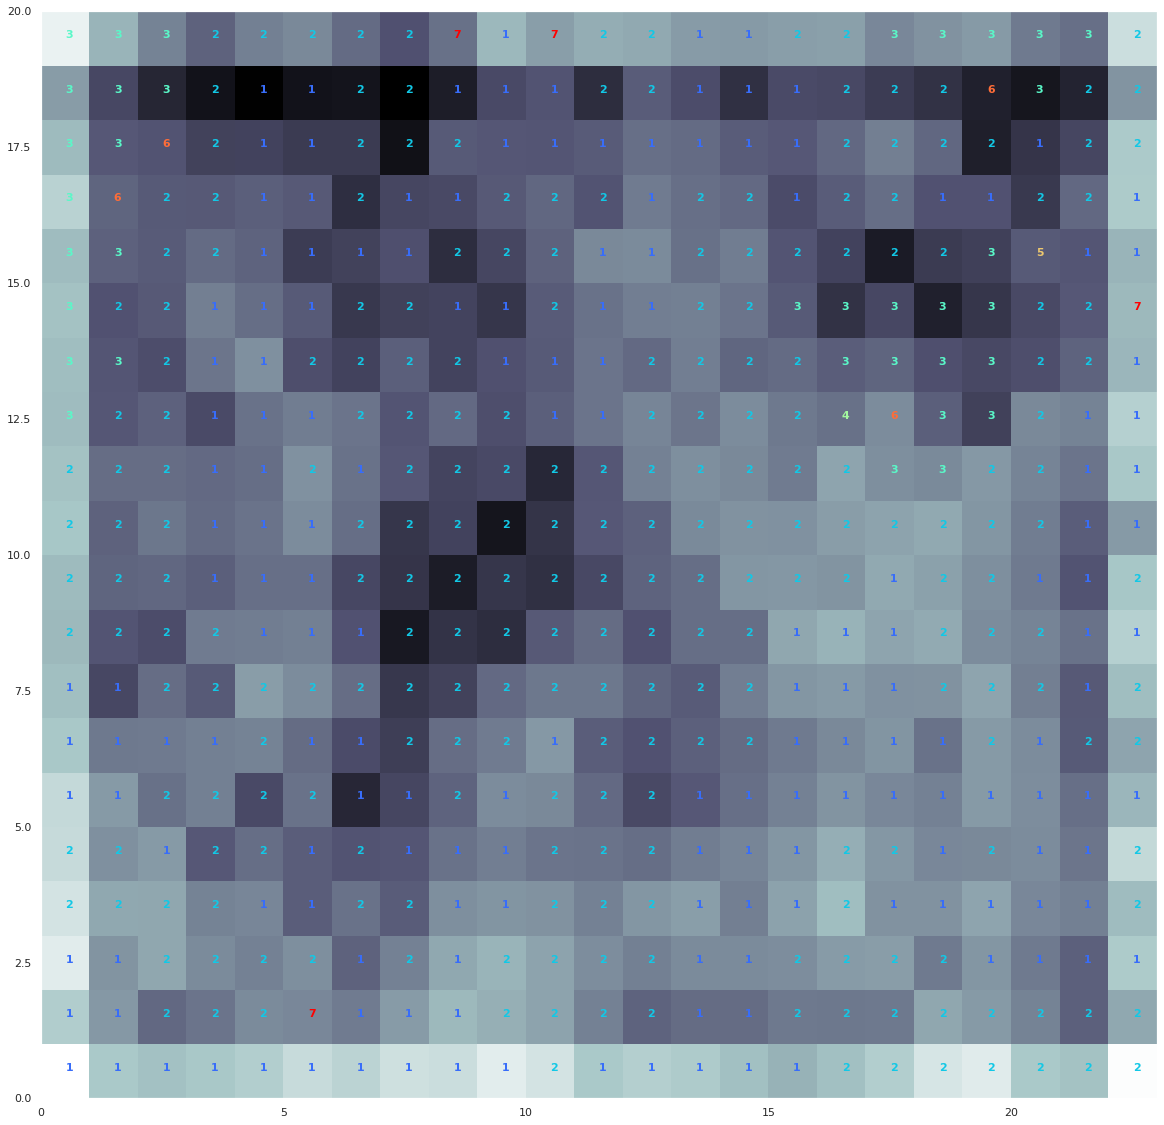

In [28]:
plt.figure(figsize=(20,20))
plt.pcolor(som.distance_map().T, cmap='bone_r')

for i, j in sorted(class_assignments.keys()):
    t = class_assignments[(i, j)].most_common()[0][0]
    plt.text(i+.5, j+.5, str(int(t)), color=plt.cm.rainbow(t / 7.), fontdict={'weight': 'bold',  'size': 11})
plt.show()


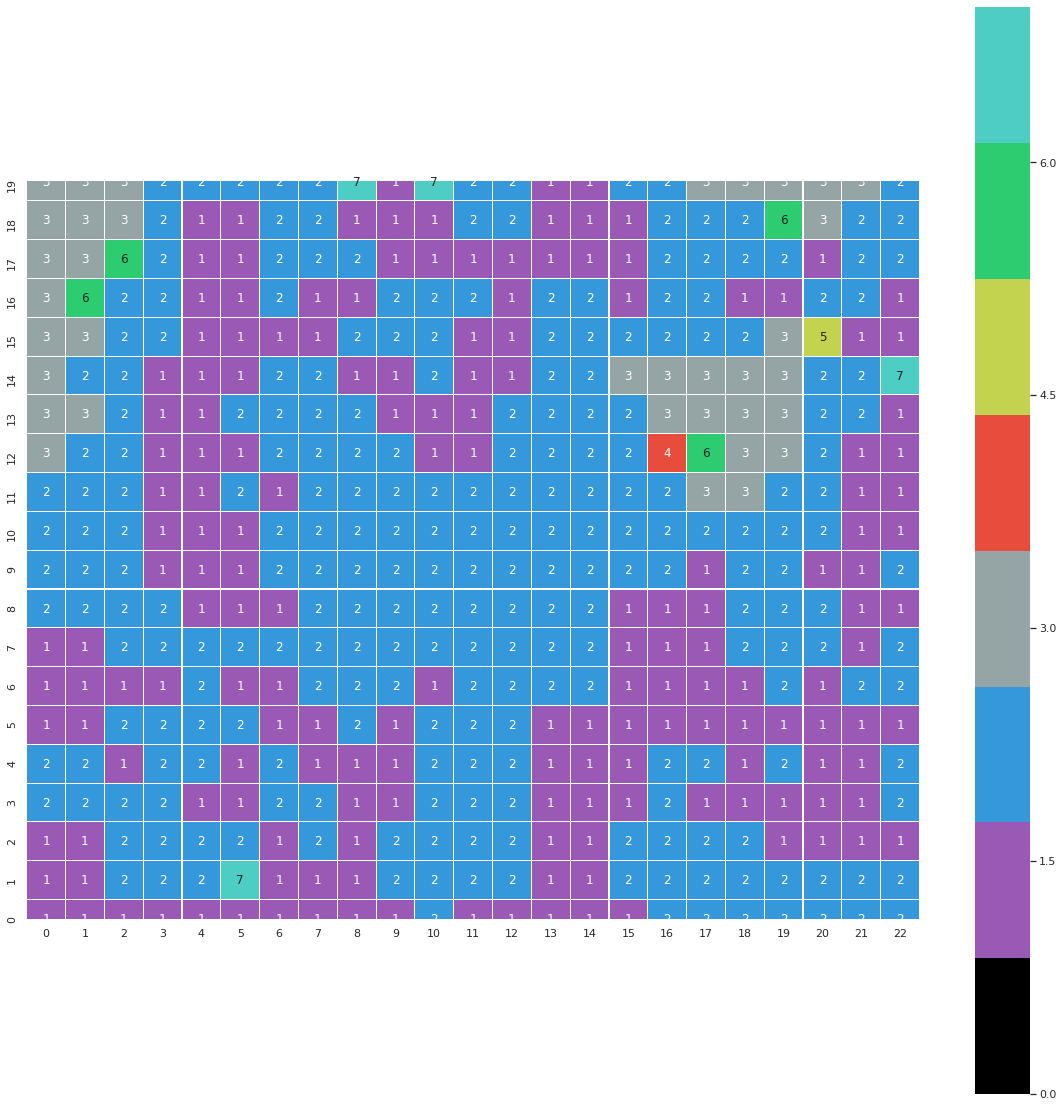

In [29]:
hmap = np.zeros((som_x, som_y))
for i, j in sorted(class_assignments.keys()):
    hmap[i][j] = class_assignments[(i, j)].most_common()[0][0]
hmap = hmap.T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, vmin=0, vmax=7, annot=True, robust=True, square=True, linewidth=0.1, cmap=sns.color_palette(palette=["#000000", "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#c3d350", "#2ecc71", "#4ecdc4"], n_colors=8))
ax.invert_yaxis()
plt.show()

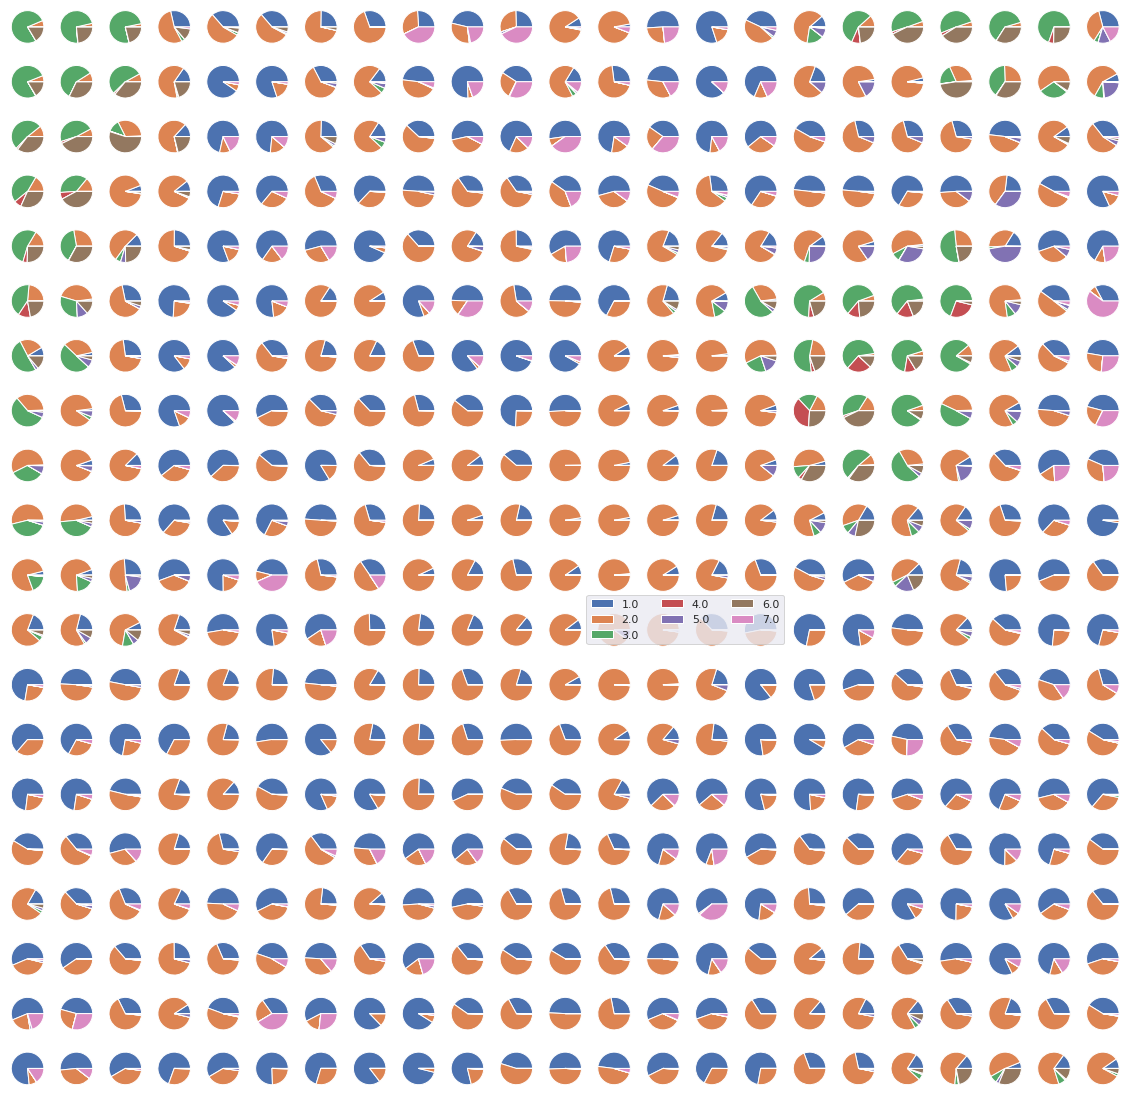

In [30]:
plt.figure(figsize=(20,20))

labels_map = som.labels_map(np.array(X_train), np.array(y_train))
label_names = np.unique(np.array(y_train))

the_grid = gds.GridSpec(som_y, som_x)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[som_y-1-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)
plt.show()


## 4. SOM Initialization and training (with standardization + class rebalancing with SMOTE)

### Data oversampling using SMOTE

In [31]:
# split, standardization and oversampling performed by covtype_resample.py
X_train = pd.read_csv('X_train_resampled.csv', header=0, index_col=0, names=X.columns)
y_train = pd.read_csv('y_train_resampled.csv', header=0, index_col=0, names=['Cover_Type']).iloc[:, 0]
X_test = pd.read_csv('X_test_resampled.csv', header=0, index_col=0, names=X.columns)
y_test = pd.read_csv('y_test_resampled.csv', header=None, index_col=0, names=['Cover_Type']).iloc[:, 0]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train.groupby(y_train).size())
print(y_test.groupby(y_test).size())

FileNotFoundError: [Errno 2] File b'X_train_resampled.csv' does not exist: b'X_train_resampled.csv'

### PCA

In [ ]:
pca = sklearn.decomposition.PCA(n_components=2)
principal_components = pca.fit_transform(X_train)
principal_components = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2'])

In [ ]:
som_ratio = pca.explained_variance_[0] / pca.explained_variance_[1]
print('Ratio: ', som_ratio)

### Initializing and training the SOM

In [ ]:
# initialize som
som_x, som_y = int(round(som_ratio * som_size)), int(round(som_size))
num_iteration = som_x * som_y * 100
som = minisom.MiniSom(som_x, som_y, X_train.shape[1])


In [ ]:
# Training the SOM
som.pca_weights_init(np.array(X_train))
# som.train_random(np.array(X_train), num_iteration, verbose=True)
som.train_batch(np.array(X_train), num_iteration, verbose=True)


In [ ]:
# Trying to classify the test dataset
class_assignments = som.labels_map(np.array(X_train), np.array(y_train))
print(sklearn.metrics.classification_report(
    np.array(y_test), classify(som, np.array(X_test), class_assignments)))


### Visualizing training results

In [ ]:
plt.figure(figsize=(20,20))
plt.pcolor(som.distance_map().T, cmap='bone_r')

for i, j in sorted(class_assignments.keys()):
    t = class_assignments[(i, j)].most_common()[0][0]
    plt.text(i+.5, j+.5, str(int(t)), color=plt.cm.rainbow(t / 7.), fontdict={'weight': 'bold',  'size': 11})
plt.show()


In [ ]:
hmap = np.zeros((som_x, som_y))
for i, j in sorted(class_assignments.keys()):
    hmap[i][j] = class_assignments[(i, j)].most_common()[0][0]
hmap = hmap.T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, vmin=0, vmax=7, annot=True, robust=True, square=True, linewidth=0.1, cmap=sns.color_palette(palette=["#000000", "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#c3d350", "#2ecc71", "#4ecdc4"], n_colors=8))
ax.invert_yaxis()
plt.show()

In [ ]:
plt.figure(figsize=(20,20))

labels_map = som.labels_map(np.array(X_train), np.array(y_train))
label_names = np.unique(np.array(y_train))

the_grid = gds.GridSpec(som_y, som_x)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[som_y-1-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)
plt.show()


## 5. SOM Initialization and training (with standardization + training dataset from Kaggle (balanced class distribuition))

### Loading dataset

In [ ]:
df_kaggle = pd.read_csv('train.csv', index_col='Id')

In [ ]:
df_kaggle.head()

In [ ]:
df_kaggle.describe()

### Using original dataset as testing set

In [ ]:
# separate into training and testing sets
X_train, y_train = df_kaggle.iloc[:, :-1], df_kaggle.iloc[:, -1]
X_test, y_test = X, y
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train.groupby(y_train).size())
print(y_test.groupby(y_test).size())


### Data standardization

In [ ]:

# using sklearn's StandardScaler
std = sklearn.preprocessing.StandardScaler()

X_train = X_train.copy()
X_test = X_test.copy()
X_train.iloc[:, :10] = std.fit_transform(X_train.iloc[:, :10])
X_test.iloc[:, :10] = std.transform(X_test.iloc[:, :10])

### PCA

In [ ]:
pca = sklearn.decomposition.PCA(n_components=2)
principal_components = pca.fit_transform(X_train)
principal_components = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2'])

In [ ]:
som_ratio = pca.explained_variance_[0] / pca.explained_variance_[1]
print('Ratio: ', som_ratio)

### Initializing and training the SOM

In [ ]:
# initialize som
som_x, som_y = int(round(som_ratio * som_size)), int(round(som_size))
num_iteration = som_x * som_y * 100
som = minisom.MiniSom(som_x, som_y, X_train.shape[1])


In [ ]:
# Training the SOM
som.pca_weights_init(np.array(X_train))
# som.train_random(np.array(X_train), num_iteration, verbose=True)
som.train_batch(np.array(X_train), num_iteration, verbose=True)


In [ ]:
# Trying to classify the test dataset
class_assignments = som.labels_map(np.array(X_train), np.array(y_train))
print(sklearn.metrics.classification_report(
    np.array(y_test), classify(som, np.array(X_test), class_assignments)))


### Visualizing training results

In [ ]:
plt.figure(figsize=(20,20))
plt.pcolor(som.distance_map().T, cmap='bone_r')

for i, j in sorted(class_assignments.keys()):
    t = class_assignments[(i, j)].most_common()[0][0]
    plt.text(i+.5, j+.5, str(int(t)), color=plt.cm.rainbow(t / 7.), fontdict={'weight': 'bold',  'size': 11})
plt.show()


In [ ]:
hmap = np.zeros((som_x, som_y))
for i, j in sorted(class_assignments.keys()):
    hmap[i][j] = class_assignments[(i, j)].most_common()[0][0]
hmap = hmap.T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, vmin=0, vmax=7, annot=True, robust=True, square=True, linewidth=0.1, cmap=sns.color_palette(palette=["#000000", "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#c3d350", "#2ecc71", "#4ecdc4"], n_colors=8))
ax.invert_yaxis()
plt.show()

In [ ]:
plt.figure(figsize=(20,20))

labels_map = som.labels_map(np.array(X_train), np.array(y_train))
label_names = np.unique(np.array(y_train))

the_grid = gds.GridSpec(som_y, som_x)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[som_y-1-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)
plt.show()


## 6. SOM Initialization and training (with standardization)

### Separating into training and testing datasets

In [ ]:
# separate into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train.groupby(y_train).size())
print(y_test.groupby(y_test).size())

### Data standardization

In [ ]:
# using sklearn's StandardScaler
std = sklearn.preprocessing.StandardScaler()

X_train = X_train.copy()
X_test = X_test.copy()
X_train.iloc[:, :10] = std.fit_transform(X_train.iloc[:, :10])
X_test.iloc[:, :10] = std.transform(X_test.iloc[:, :10])


### PCA

In [ ]:
pca = sklearn.decomposition.PCA(n_components=2)
principal_components = pca.fit_transform(X_train)
principal_components = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2'])

In [ ]:
som_ratio = pca.explained_variance_[0] / pca.explained_variance_[1]
print('Ratio: ', som_ratio)

### Initializing and training the SOM

In [ ]:
# initialize som
som_x, som_y = int(round(som_ratio * som_size)), int(round(som_size))
num_iteration = som_x * som_y * 100
som = minisom.MiniSom(som_x, som_y, X_train.shape[1])


In [ ]:
# Training the SOM
som.pca_weights_init(np.array(X_train))
# som.train_random(np.array(X_train), num_iteration, verbose=True)
som.train_batch(np.array(X_train), num_iteration, verbose=True)


In [ ]:
# Trying to classify the test dataset
class_assignments = som.labels_map(np.array(X_train), np.array(y_train))
print(sklearn.metrics.classification_report(
    np.array(y_test), classify(som, np.array(X_test), class_assignments)))


### Visualizing training results

In [ ]:
plt.figure(figsize=(20,20))
plt.pcolor(som.distance_map().T, cmap='bone_r')

for i, j in sorted(class_assignments.keys()):
    t = class_assignments[(i, j)].most_common()[0][0]
    plt.text(i+.5, j+.5, str(int(t)), color=plt.cm.rainbow(t / 7.), fontdict={'weight': 'bold',  'size': 11})
plt.show()


In [ ]:
hmap = np.zeros((som_x, som_y))
for i, j in sorted(class_assignments.keys()):
    hmap[i][j] = class_assignments[(i, j)].most_common()[0][0]
hmap = hmap.T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, vmin=0, vmax=7, annot=True, robust=True, linewidth=0.1, cmap=sns.color_palette(palette=["#000000", "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#c3d350", "#2ecc71", "#4ecdc4"], n_colors=8))
ax.invert_yaxis()
plt.show()

In [ ]:
plt.figure(figsize=(20,20))

labels_map = som.labels_map(np.array(X_train), np.array(y_train))
label_names = np.unique(np.array(y_train))

the_grid = gds.GridSpec(som_y, som_x)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[som_y-1-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)
plt.show()


## 7. Testing different parameters for SOM

In [ ]:
# testing initial learning rates
learning_rates_list = [2**(i-2) for i in range(1, 5)]
# testing sigma with odd values from 1 to min(som_x, som_y)
sigmas_list = list(range(1, min([som_x, som_y]), 2))
# testing different neighborhood_functions
neighborhood_functions_list = ['gaussian', 'bubble']

print(learning_rates_list)
print(sigmas_list)
print(neighborhood_functions_list)

In [ ]:
quantization_errors = []
for i in sigmas_list:
    for j in learning_rates_list:
        for k in neighborhood_functions_list:
            # initialize som
            print('Sigma\tLearning_rate\tNeighborhood_function')
            print(i, j, k, sep='\t')
            som_x, som_y = int(round(som_ratio * som_size)), int(round(som_size))
            num_iteration = som_x * som_y * 100
            som = minisom.MiniSom(som_x, som_y, X_train.shape[1], sigma=i, learning_rate=j, neighborhood_function=k)
            # Training the SOM
            som.pca_weights_init(np.array(X_train))
            # som.train_random(np.array(X_train), num_iteration, verbose=True)
            som.train_batch(np.array(X_train), num_iteration, verbose=True)
            quantization_errors.append([i, j, k, som.quantization_error(np.array(X_train))])
            # Trying to classify the test dataset
            class_assignments = som.labels_map(np.array(X_train), np.array(y_train))
            print(sklearn.metrics.classification_report(
                np.array(y_test), classify(som, np.array(X_test), class_assignments)))


### Selecting parameters for the smallest quantization error

In [ ]:
qe = np.array(quantization_errors)

In [ ]:
qe[qe[:, -1].argsort()]

In [ ]:
# selecting sigma = 1, learning_rate = 0.5, neighborhood_function = ['gaussian', 'bubble']
sigma = 1
learning_rate = 0.5
neighborhood_function = ['gaussian', 'bubble'] # training and comparing both functions

## 8. SOM Initialization and training (with standardizatiom + selected parameters), with gaussian neighborhood function

### Training with a larger network

In [ ]:
som_size = 100

### Separating into training and testing datasets

In [ ]:
# separate into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train.groupby(y_train).size())
print(y_test.groupby(y_test).size())

### Data standardization

In [ ]:
# using sklearn's StandardScaler
std = sklearn.preprocessing.StandardScaler()

X_train = X_train.copy()
X_test = X_test.copy()
X_train.iloc[:, :10] = std.fit_transform(X_train.iloc[:, :10])
X_test.iloc[:, :10] = std.transform(X_test.iloc[:, :10])


### PCA

In [ ]:
pca = sklearn.decomposition.PCA(n_components=2)
principal_components = pca.fit_transform(X_train)
principal_components = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2'])

In [ ]:
som_ratio = pca.explained_variance_[0] / pca.explained_variance_[1]
print('Ratio: ', som_ratio)

### Initializing and training the SOM

In [ ]:
# initialize som
som_x, som_y = int(round(som_ratio * som_size)), int(round(som_size))
num_iteration = som_x * som_y * 100
som = minisom.MiniSom(som_x, som_y, X_train.shape[1], sigma=sigma, learning_rate=learning_rate, neighborhood_function=neighborhood_function[0])


In [ ]:
print(som_x, som_y)

In [ ]:
# Training the SOM
som.pca_weights_init(np.array(X_train))
# som.train_random(np.array(X_train), num_iteration, verbose=True)
som.train_batch(np.array(X_train), num_iteration, verbose=True)


In [ ]:
# Trying to classify the test dataset
class_assignments = som.labels_map(np.array(X_train), np.array(y_train))
print(sklearn.metrics.classification_report(
    np.array(y_test), classify(som, np.array(X_test), class_assignments)))


### Visualizing training results

In [ ]:
plt.figure(figsize=(20,20))
plt.pcolor(som.distance_map().T, cmap='bone_r')

for i, j in sorted(class_assignments.keys()):
    t = class_assignments[(i, j)].most_common()[0][0]
    plt.text(i+.5, j+.5, str(int(t)), color=plt.cm.rainbow(t / 7.), fontdict={'weight': 'bold',  'size': 11})
plt.show()


In [ ]:
hmap = np.zeros((som_x, som_y))
for i, j in sorted(class_assignments.keys()):
    hmap[i][j] = class_assignments[(i, j)].most_common()[0][0]
hmap = hmap.T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, vmin=0, vmax=7, annot=True, robust=True, linewidth=0.1, cmap=sns.color_palette(palette=["#000000", "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#c3d350", "#2ecc71", "#4ecdc4"], n_colors=8))
ax.invert_yaxis()
plt.show()

In [ ]:
plt.figure(figsize=(20,20))

labels_map = som.labels_map(np.array(X_train), np.array(y_train))
label_names = np.unique(np.array(y_train))

the_grid = gds.GridSpec(som_y, som_x)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[som_y-1-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)
plt.show()


### Visualizing activation responses

In [ ]:
# mapping most activated neurons
hmap = np.array(som.activation_response(np.array(X_train))).T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, robust=True, linewidth=0.1, cmap='BuGn_r')
ax.invert_yaxis()
plt.show()

### Visualizing distribution of features 

#### Elevation

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som.get_weights()[:, :, 0].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()

#### Aspect

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som.get_weights()[:, :, 1].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()

#### Slope

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som.get_weights()[:, :, 2].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()

#### Horizontal_Distance_To_Hydrology

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som.get_weights()[:, :, 3].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()

#### Vertical_Distance_To_Hydrology

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som.get_weights()[:, :, 4].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()

#### Horizontal_Distance_To_Roadways

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som.get_weights()[:, :, 5].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()

#### Hillshade_9am

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som.get_weights()[:, :, 6].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()

#### Hillshade_Noon

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som.get_weights()[:, :, 7].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()

#### Hillshade_3pm

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som.get_weights()[:, :, 8].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()

#### Horizontal_Distance_To_Fire_Points

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som.get_weights()[:, :, 9].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()

## 9. SOM Initialization and training (with standardizatiom + selected parameters), with bubble neighborhood function

### Training with a larger network

In [ ]:
som_size = 50

### Data standardization

In [ ]:
# using sklearn's StandardScaler
std = sklearn.preprocessing.StandardScaler()

X_train = X_train.copy()
X_test = X_test.copy()
X_train.iloc[:, :10] = std.fit_transform(X_train.iloc[:, :10])
X_test.iloc[:, :10] = std.transform(X_test.iloc[:, :10])


### PCA

In [ ]:
pca = sklearn.decomposition.PCA(n_components=2)
principal_components = pca.fit_transform(X_train)
principal_components = pd.DataFrame(data=principal_components, columns=['pc1', 'pc2'])

In [ ]:
som_ratio = pca.explained_variance_[0] / pca.explained_variance_[1]
print('Ratio: ', som_ratio)

### Initializing and training the SOM

In [ ]:
# initialize som
som_x, som_y = int(round(som_ratio * som_size)), int(round(som_size))
num_iteration = som_x * som_y * 100
som2 = minisom.MiniSom(som_x, som_y, X_train.shape[1], sigma=sigma, learning_rate=learning_rate, neighborhood_function=neighborhood_function[1])


In [ ]:
# Training the SOM
som2.pca_weights_init(np.array(X_train))
# som.train_random(np.array(X_train), num_iteration, verbose=True)
som2.train_batch(np.array(X_train), num_iteration, verbose=True)


In [ ]:
# Trying to classify the test dataset
class_assignments = som2.labels_map(np.array(X_train), np.array(y_train))
print(sklearn.metrics.classification_report(
    np.array(y_test), classify(som2, np.array(X_test), class_assignments)))


### Visualizing training results

In [ ]:
plt.figure(figsize=(20,20))
plt.pcolor(som2.distance_map().T, cmap='bone_r')

for i, j in sorted(class_assignments.keys()):
    t = class_assignments[(i, j)].most_common()[0][0]
    plt.text(i+.5, j+.5, str(int(t)), color=plt.cm.rainbow(t / 7.), fontdict={'weight': 'bold',  'size': 11})
plt.show()


In [ ]:
hmap = np.zeros((som_x, som_y))
for i, j in sorted(class_assignments.keys()):
    hmap[i][j] = class_assignments[(i, j)].most_common()[0][0]
hmap = hmap.T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, vmin=0, vmax=7, annot=True, robust=True, linewidth=0.1, cmap=sns.color_palette(palette=["#000000", "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#c3d350", "#2ecc71", "#4ecdc4"], n_colors=8))
ax.invert_yaxis()
plt.show()

In [ ]:
plt.figure(figsize=(20,20))

labels_map = som2.labels_map(np.array(X_train), np.array(y_train))
label_names = np.unique(np.array(y_train))

the_grid = gds.GridSpec(som_y, som_x)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[som_y-1-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, bbox_to_anchor=(0, 1.5), ncol=3)
plt.show()


### Visualizing activation responses

In [ ]:
# mapping most activated neurons
hmap = np.array(som2.activation_response(np.array(X_train))).T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, robust=True, linewidth=0.1, cmap='BuGn_r')
ax.invert_yaxis()
plt.show()

### Visualizing distribution of features 

#### Elevation

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som2.get_weights()[:, :, 0].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()

#### Aspect

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som2.get_weights()[:, :, 1].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()

#### Slope

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som2.get_weights()[:, :, 2].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()

#### Horizontal_Distance_To_Hydrology

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som2.get_weights()[:, :, 3].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()

#### Vertical_Distance_To_Hydrology

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som2.get_weights()[:, :, 4].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()

#### Horizontal_Distance_To_Roadways

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som2.get_weights()[:, :, 5].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()

#### Hillshade_9am

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som2.get_weights()[:, :, 6].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()

#### Hillshade_Noon

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som2.get_weights()[:, :, 7].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()

#### Hillshade_3pm

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som2.get_weights()[:, :, 8].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()

#### Horizontal_Distance_To_Fire_Points

In [ ]:
# mapping most activated neurons
# hmap = np.array(som.activation_response(np.array(X_train))).T
hmap = som2.get_weights()[:, :, 9].T
plt.figure(figsize=(20,20))
ax = sns.heatmap(hmap, center=0, robust=True, linewidth=0.1, cmap='BrBG')
ax.invert_yaxis()
plt.show()